This module will focus on how to do sparse representation
There are few advantages in doing so
1) Efficiency: Only a few units fire for each input, reducing computation and storage
2) Interpretability: Active units often correspond to meaningful features
3) Regularization: Limits overfitting by forcing the model to use the strongest signal

Average sparsity of learned codes: 0.32


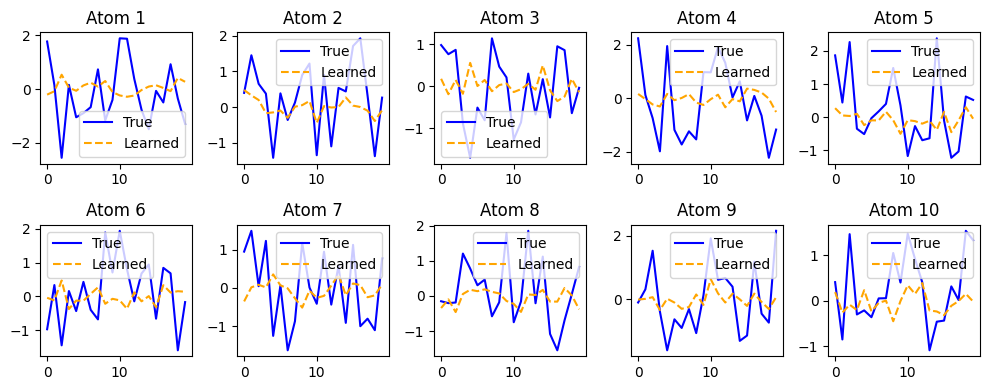

In [2]:
### Sparse Coding via Orthogonal Matching Pursuit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
from sklearn.linear_model import OrthogonalMatchingPursuit

### Generate synthetic data
n_samples, n_features, n_components = 500, 20, 10

rng = np.random.RandomState(0)
W_true = rng.randn(n_features, n_components) # Dictionary with shape (20, 10)
H_true = rng.randn(n_samples, n_components) # Sparse codes (500, 10) with many zeros
for i in range(n_samples):
    nonzero_indices = rng.choice(n_components, size=2, replace=False) # Pick 2 random atom indices
    H_true[i, nonzero_indices] = rng.randn(2) # Set 2 random atoms to non-zero values
X = W_true @ H_true.T # Noiseless data matrix (20, 500)
X = X.T + 0.1 * rng.randn(n_samples, n_features) # transpose to (500, 20) and add noise

# Learn dictionary using DictionaryLearning
dict_learner = DictionaryLearning(
    n_components=n_components,
    transform_algorithm='omp',
    transform_n_nonzero_coefs=2,
    random_state=0
)
H_est = dict_learner.fit_transform(X) # Sparse codes (500, 10)
W_est = dict_learner.components_.T # Extract learned dictionary and transpose to (20, 10)

# Inspect sparsity of learned codes
sparsity = np.mean((H_est == 0).sum(axis=1) / n_components) # Compute average fraction of zeros per code vector
print(f'Average sparsity of learned codes: {sparsity:.2f}') # Expect around 0.8 since we set 2 out of 10 to be non-zero

# Plot true vs learned dictionary atoms
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.plot(W_true[:, i], label='True', color='blue')
    ax.plot(W_est[:, i], label='Learned', color='orange', linestyle='--')
    ax.set_title(f'Atom {i+1}')
    ax.legend()
plt.tight_layout()
plt.show()

How does the above code work?

Data generation gives you control over true sparsity.

DictionaryLearning+OMP demonstrates how to learn both the basis 𝑊 and sparse codes ℎ from only the noisy observations 𝑋. (Dictionary Learning)

Sparsity measurement shows that the hidden representations remain sparse, highlighting how OMP enforces a compact, interpretable code for each input.